# Determine π via Monte Carlo simulation

This notebook shows a classical example of a Monte Carlo method: the evaluation of π ! 

## Monte Carlo

In [1]:
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

# Define the "true" value of pi
true_pi = 3.14159265358979323846

# Generate the sample list
num_samples_list = [10 ** i for i in range(0, 6)]

# Allocate the lists
difference_list = []
estimated_pi_list = []
inside_points_list = [] 
outside_points_list = []

def generate_points(num_samples):
    inside_circle = 0
    inside_points = []
    outside_points = []
    # Monte Carlo
    for _ in range(num_samples):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        if x**2 + y**2 <= 1:
            inside_circle += 1
            inside_points.append((x, y))
        else:
            outside_points.append((x, y))
            
    # Pi estimation        
    estimated_pi = 4 * inside_circle / num_samples
    estimated_pi_list.append(estimated_pi)
    
    # Difference calculation
    difference = abs(estimated_pi - np.pi)
    difference_list.append(difference)

    inside_points_list.append(inside_points) 
    outside_points_list.append(outside_points)  

# Calcolo dei punti per ogni iterazione
for num_samples in tqdm(num_samples_list, desc='Sampling Progress'):
    generate_points(num_samples)


Sampling Progress: 100%|██████████████████████████| 6/6 [00:00<00:00, 82.19it/s]


## Impact of the sampling

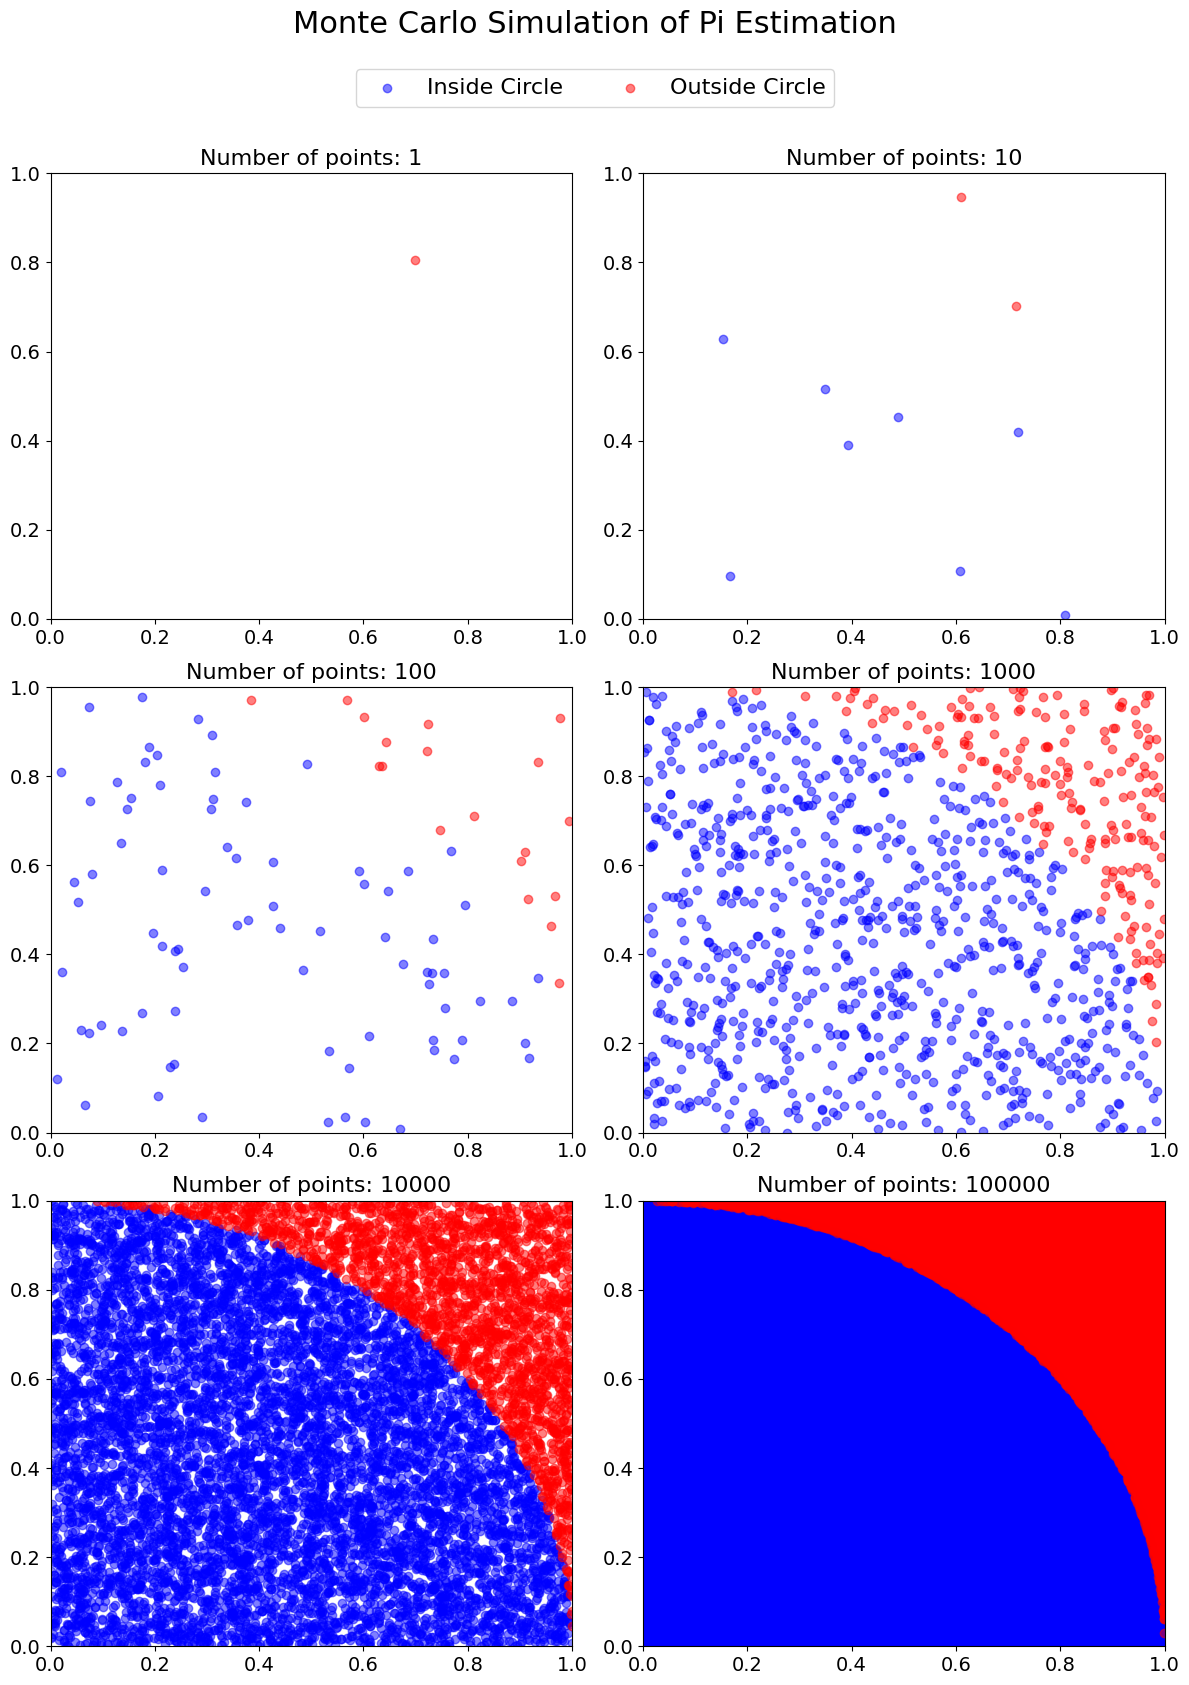

In [17]:
# Plot dei punti dentro e fuori il cerchio per ogni iterazione
num_iterations = len(num_samples_list)
num_cols = 2  # Due colonne per i subplot
num_rows = (num_iterations + 1) // num_cols  # Calcolo del numero di righe

# Imposta le dimensioni della figura e la dimensione dei subplot
fig_width = 12
fig_height = 6
subplot_size = 5  # Dimensioni desiderate per i subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, 16))

for i in range(num_iterations):
    row = i // num_cols
    col = i % num_cols
    
    # Controllo se la lista dei punti dentro al cerchio è vuota
    if inside_points_list[i]:
        inside_x, inside_y = zip(*inside_points_list[i])
        axs[row, col].scatter(inside_x, inside_y, color='blue', label='Inside Circle', alpha=0.5)
    
    # Controllo se la lista dei punti fuori dal cerchio è vuota
    if outside_points_list[i]:
        outside_x, outside_y = zip(*outside_points_list[i])
        axs[row, col].scatter(outside_x, outside_y, color='red', label='Outside Circle', alpha=0.5)
    
    axs[row, col].set_title(f'Number of points: {num_samples_list[i]}', fontsize=16)  # Imposta il titolo con font più grande
    
    # Imposta i limiti degli assi x e y
    axs[row, col].set_xlim([0, 1])
    axs[row, col].set_ylim([0, 1])
    
    # Imposta i ticks con font più grande e leggibile
    axs[row, col].tick_params(axis='both', which='major', labelsize=14)

# Aggiungi un titolo comune sopra i subplots
fig.suptitle('Monte Carlo Simulation of Pi Estimation', fontsize=22, y=1.05)  # Imposta il titolo sopra i subplots con font più grande

# Ottieni handles e labels dal primo subplot
handles, labels = axs[1, 1].get_legend_handles_labels()

# Aggiungi una legenda comune sopra i subplots in orizzontale
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), fontsize=16, ncol=2)  # Imposta la legenda comune sopra i subplots con font più grande e in orizzontale

# Aggiusta lo spaziamento tra i subplot
plt.tight_layout()
plt.show()


## Sampling an π evalutation

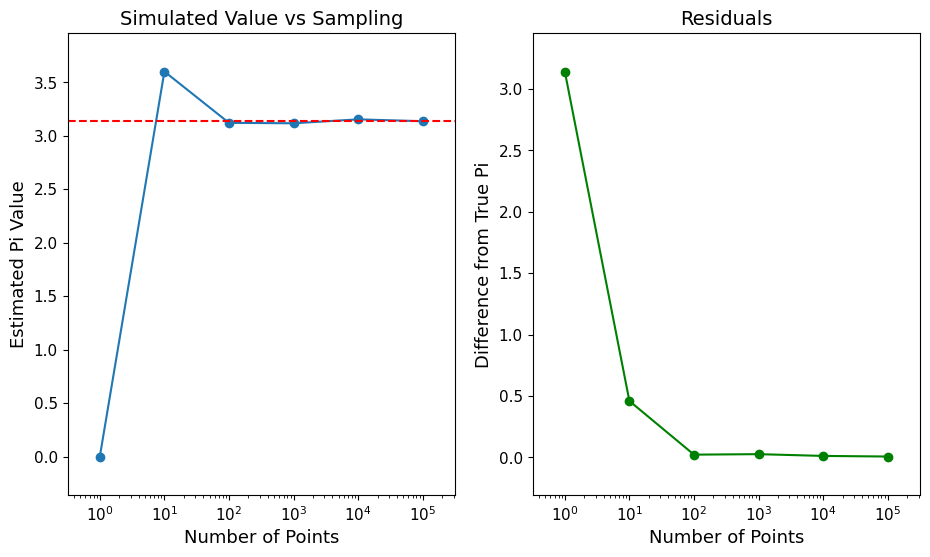

In [44]:
# Plot dell'andamento del valore calcolato con il numero di punti
plt.figure(figsize=(11, 6))

plt.subplot(1, 2, 1)
plt.plot(num_samples_list, estimated_pi_list, marker='o')
plt.axhline(y=np.pi, color='r', linestyle='--', label='$\pi$')
plt.xscale('log')
plt.xlabel('Number of Points', fontsize=13)
plt.ylabel('Estimated Pi Value', fontsize=13)
plt.xscale('log')
plt.tick_params(axis='both', which='major', labelsize=11)
plt.title('Simulated Value vs Sampling', fontsize=14)
plt.gca().margins(0.1) 

# Plot della differenza fra il valore calcolato e il valore vero
plt.subplot(1, 2, 2)
plt.plot(num_samples_list, difference_list, marker='o', color='green')
plt.xscale('log')
plt.xlabel('Number of Points', fontsize=13)
plt.ylabel('Difference from True Pi', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=11)
plt.title('Residuals', fontsize=14)
plt.gca().margins(0.1) 
#plt.tight_layout()

plt.show()